In [15]:
from torchvision import models 
import torch
import torch.nn as nn  
import torch.optim as optim
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
torch.set_warn_always(False)

from PIL import Image 
import requests
from io import BytesIO

In [16]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [17]:
alexNet = models.alexnet(pretrained = True)
transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(224), 
    transforms.ToTensor(), transforms.Normalize(
        mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]
    )
])

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
print(alexNet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

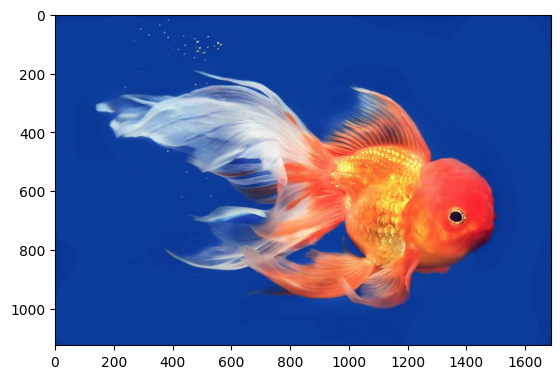

In [19]:
response = requests.get('https://www.fishkeepingworld.com/wp-content/uploads/2019/10/Goldfish-A-Z-Best-Types-Of-Goldfish-Single-Tail-And-Fancy-Banner.jpg')
img = Image.open(BytesIO(response.content))
plt.imshow(img);

In [23]:
img_t = transform(img)
batch = torch.unsqueeze(img_t, 0) # to make it suitable for model
alexNet.eval()
pred = alexNet(batch)
print(pred.shape)

torch.Size([1, 1000])


In [25]:
!git clone https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
with open('942d3a0ac09ec9e5eb3a/imagenet1000_clsidx_to_labels.txt') as f :
    classes = [line.strip() for line in f.readlines()]

Cloning into '942d3a0ac09ec9e5eb3a'...


In [26]:
labels = []
for label in classes : 
    labels.append(label.rsplit(':')[1])

print(labels)

[" 'tench, Tinca tinca',", " 'goldfish, Carassius auratus',", " 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',", " 'tiger shark, Galeocerdo cuvieri',", " 'hammerhead, hammerhead shark',", " 'electric ray, crampfish, numbfish, torpedo',", " 'stingray',", " 'cock',", " 'hen',", " 'ostrich, Struthio camelus',", " 'brambling, Fringilla montifringilla',", " 'goldfinch, Carduelis carduelis',", " 'house finch, linnet, Carpodacus mexicanus',", " 'junco, snowbird',", " 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',", " 'robin, American robin, Turdus migratorius',", " 'bulbul',", " 'jay',", " 'magpie',", " 'chickadee',", " 'water ouzel, dipper',", " 'kite',", " 'bald eagle, American eagle, Haliaeetus leucocephalus',", " 'vulture',", " 'great grey owl, great gray owl, Strix nebulosa',", " 'European fire salamander, Salamandra salamandra',", " 'common newt, Triturus vulgaris',", " 'eft',", " 'spotted salamander, Ambystoma maculatum',", " 'axo

In [29]:
_, index = torch.max(pred, 1)
pecentage = torch.nn.functional.softmax(pred, dim=1)[0]*100
print(labels[index[0]], pecentage[index[0]].item())

 'goldfish, Carassius auratus', 58.674800872802734
